# Video Game Sales 

### Imports and intilizing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
# Suppress seaborn FutureWarning about passing `palette` without `hue`
warnings.filterwarnings("ignore", category=FutureWarning, message=r".*palette.*hue.*")

### Video Games Sales Data Preparetion 

#### Reading the Video games sales data

In [2]:
df = pd.read_csv('vgsales.csv', header=0, delimiter=',')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Dataframe Info  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Checking for nulls

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Checking for duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

#### Dropping data points with NA's, Duplicates and Dropping Rank column

In [6]:
df.dropna(inplace=True)
df.drop(columns=['Rank'], inplace=True)
df.drop_duplicates(inplace=True)    # Removing duplicates if any but as it stands there are none    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


#### Converting Year Column from float to int

In [7]:
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


#### Final Dataset 

* Rows      -   16291 
* Columns   -   10

In [8]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
df.shape

(16291, 10)

### Sales across regions 

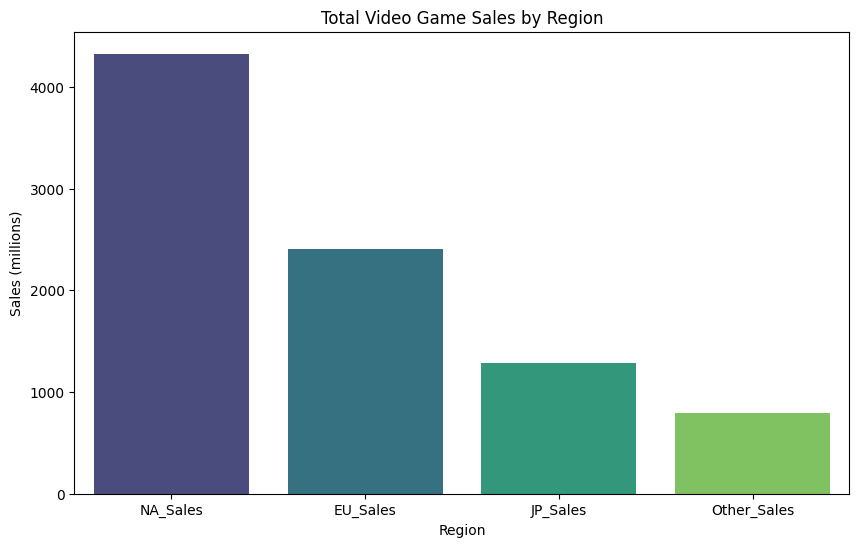

In [10]:
region_totals = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_df = region_totals.reset_index()
region_df.columns = ['Region', 'Sales']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=region_df, x='Region', y='Sales', hue='Region', dodge=False, palette='viridis')
leg = ax.get_legend()
if leg:
    leg.remove()

plt.title('Total Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.show()

Total Video Game Sales by Region
- North America (NA) shows highest total sales
- Europe (EU) follows as second largest market
- Japan (JP) shows significant but lower sales volume
- Other regions combined show smallest market share
- Demonstrates market concentration in NA and EU regions

### Sales Distribution by Region (Box Plot)

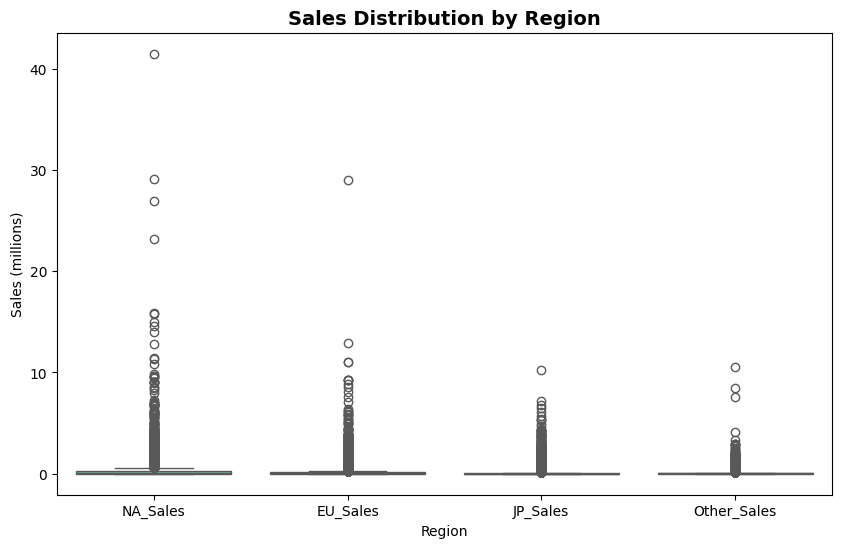

In [11]:
sales_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_melted = sales_data.melt(var_name='Region', value_name='Sales')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=sales_melted, x='Region', y='Sales', hue='Region', dodge=False, palette='Set2')
leg = ax.get_legend()
if leg:
    leg.remove()

ax.set_title('Sales Distribution by Region', fontsize=14, fontweight='bold')
ax.set_xlabel('Region')
ax.set_ylabel('Sales (millions)')
plt.show();

Box Plot - Sales Distribution by Region
- All regions show right-skewed distributions (many outliers above whiskers)
- NA shows highest median and largest spread
- EU follows similar pattern but with lower values
- JP shows more concentrated distribution
- Other regions show most compressed distribution
- Outliers present in all regions indicate "blockbuster" games

### Top 5 Games - along with sales

In [12]:
top_5 = df.nlargest(5, 'Global_Sales')[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_5 = top_5.set_index('Name')

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
totals = top_5.sum(axis=1)

fig = go.Figure()
for region in regions:
    fig.add_trace(go.Bar(
        x=top_5.index,
        y=top_5[region],
        name=region.replace('_Sales', ''),
        customdata=totals.values,
        hovertemplate='Game: %{x}<br>Region: %{fullData.name}: %{y:.2f}M<br>Total: %{customdata:.2f}M<extra></extra>'
    ))

fig.update_layout(
    barmode='group',
    title='Top 5 Games - Regional Sales (Interactive) with Total on Hover',
    xaxis_tickangle=-45,
    yaxis_title='Sales (millions)',
    legend_title='Region',
    template='plotly_white',
    width=900,
    height=500
)

fig.show()

### Heatmap of Regional Sales for Top 15 Games

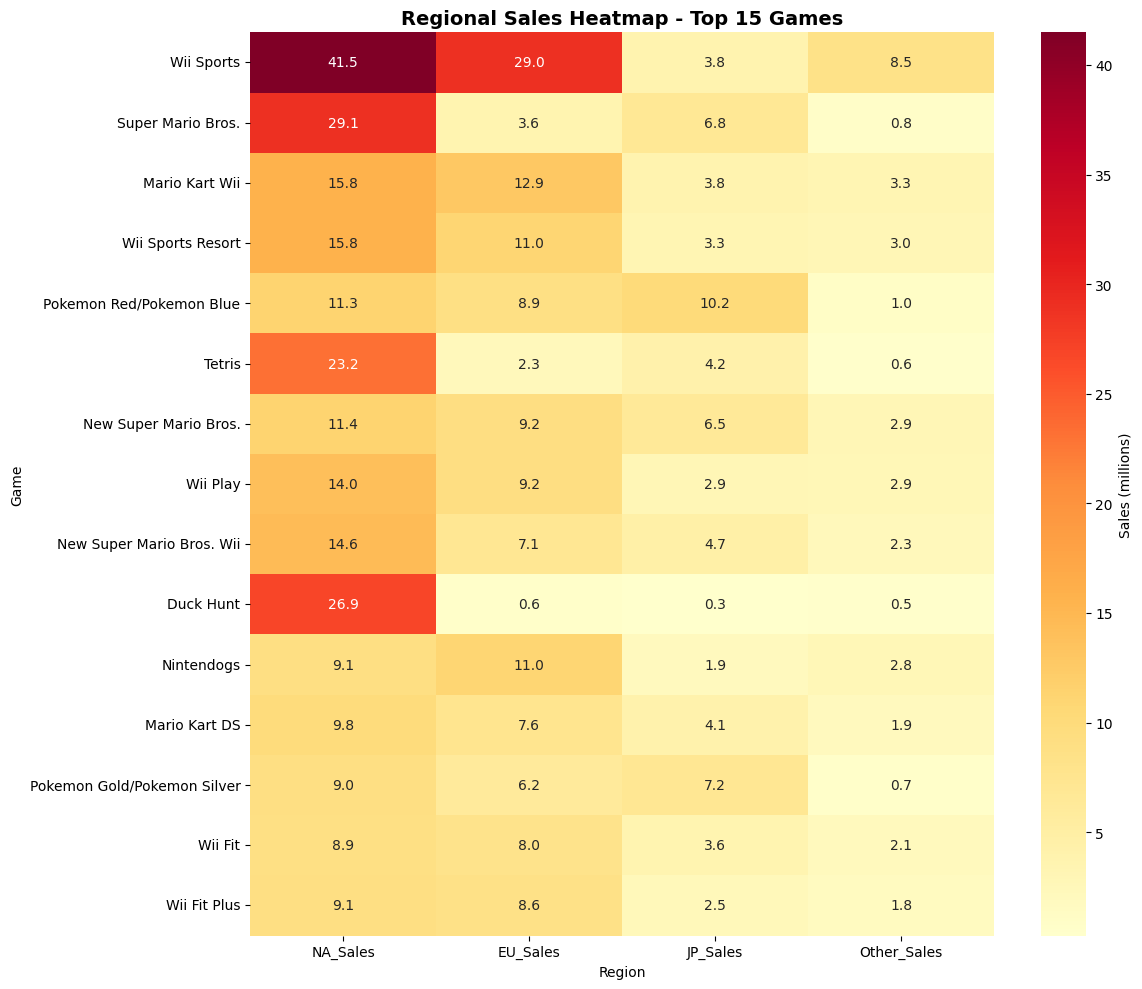

In [13]:
# Heatmap of regional sales for top 15 games (single figure)
top_15 = df.nlargest(15, 'Global_Sales')[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
heatmap_data = top_15.set_index('Name')
# Ensure column order
heatmap_data = heatmap_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

plt.figure(figsize=(12, 10))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Sales (millions)'})
ax.set_title('Regional Sales Heatmap - Top 15 Games', fontsize=14, fontweight='bold')
ax.set_xlabel('Region')
ax.set_ylabel('Game')

plt.tight_layout()
plt.show()

### Regional Sales Proportion

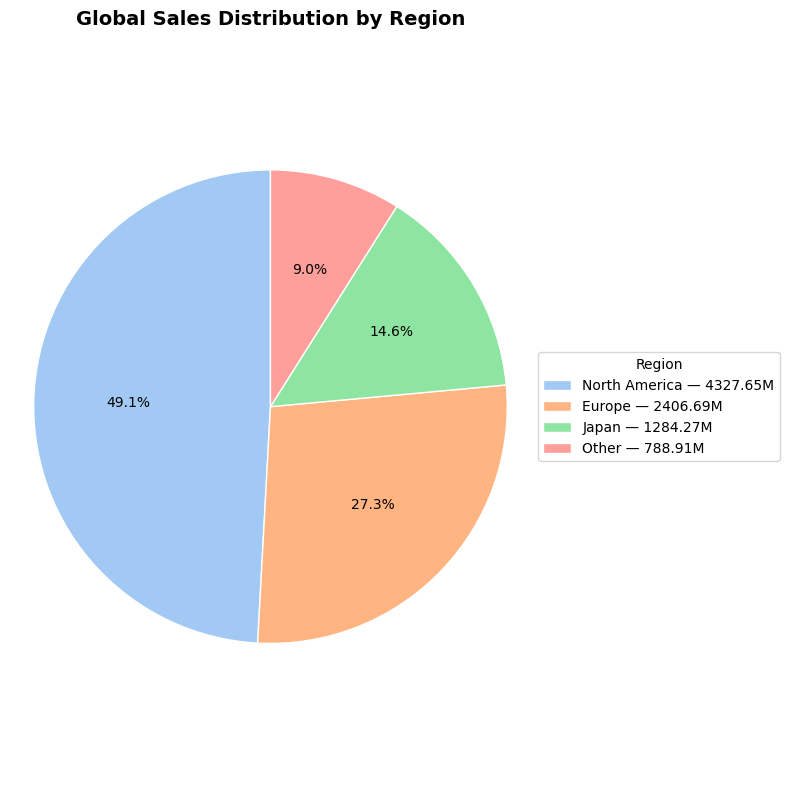

In [14]:
# Regional Sales Proportion (single figure pie chart)
region_totals = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
labels = ['North America', 'Europe', 'Japan', 'Other']
colors = sns.color_palette('pastel', n_colors=len(labels))

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    region_totals.values,
    labels=None,  # we'll use a legend for labels + values
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

ax.set_title('Global Sales Distribution by Region', fontsize=14, fontweight='bold')
# Legend with absolute values
legend_labels = [f"{lab} — {val:.2f}M" for lab, val in zip(labels, region_totals.values)]
ax.legend(wedges, legend_labels, title='Region', loc='center left', bbox_to_anchor=(1, 0.5))

# Make sure pie is drawn as a circle
ax.axis('equal')

# Style autotexts
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

 Regional Sales Proportion
- Clear visualization of global market share with NA ~50% and EU 27%
- Shows relative market size of each region

### Regional Sales Correlation

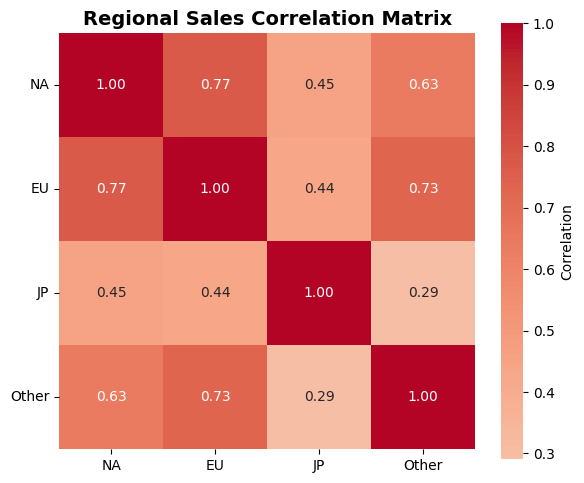

In [15]:
# Regional Sales Correlation (single figure heatmap)
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()

plt.figure(figsize=(6, 5))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                 square=True, cbar_kws={'label': 'Correlation'})
ax.set_title('Regional Sales Correlation Matrix', fontsize=14, fontweight='bold')
# set short tick labels
ax.set_xticklabels(['NA', 'EU', 'JP', 'Other'], rotation=0)
ax.set_yticklabels(['NA', 'EU', 'JP', 'Other'], rotation=0)

plt.tight_layout()
plt.show()

Regional Sales Correlation Matrix
- Shows relationships between regional sales
- Strongest correlation between NA and EU markets
- JP market shows unique patterns
- Helps understand market interconnections

### Grouped Bar Chart for Top Publishers

In [16]:
# Interactive Plotly grouped bar chart for Top 10 Publishers by total regional sales
# Aggregate regional sales by publisher
top_publishers = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# Compute totals and select top 10
top_publishers['Total'] = top_publishers.sum(axis=1)
top10 = top_publishers.nlargest(10, 'Total').drop(columns=['Total'])
labels = top10.index.tolist()
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Totals used in hover
totals = top10.sum(axis=1).values

fig = go.Figure()
for reg in regions:
    fig.add_trace(go.Bar(
        x=labels,
        y=top10[reg].values,
        name=reg.replace('_Sales', ''),
        customdata=totals,
        hovertemplate='Publisher: %{x}<br>Region: ' + reg.replace('_Sales', '') + ': %{y:.2f}M<br>Total: %{customdata:.2f}M<extra></extra>'
    ))

fig.update_layout(
    barmode='group',
    title='Top 10 Publishers - Sales by Region (Interactive)',
    xaxis_tickangle=-45,
    yaxis_title='Sales (millions)',
    legend_title='Region',
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()

### Violin Plot for Regional Sales Distribution

In [17]:
# Interactive Plotly Violin Plot for Regional Sales Distribution
import plotly.express as px

sales_melted = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].melt(var_name='Region', value_name='Sales')
# Friendly region names
sales_melted['Region'] = sales_melted['Region'].map({
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'JP_Sales': 'Japan',
    'Other_Sales': 'Other'
})

fig = px.violin(
    sales_melted,
    x='Region',
    y='Sales',
    color='Region',
    box=True,            # draw box inside the violin
    points='outliers',   # show outliers
    hover_data=['Sales'],
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    title='Regional Sales Distribution (Violin Plot) - Interactive',
    xaxis_title='Region',
    yaxis_title='Sales (millions)',
    showlegend=False,
    width=900,
    height=500,
    template='plotly_white'
)

fig.show()

### Sales by Year and Region

In [18]:
# Regional sales trends (interactive Plotly) and summary statistics
if len(df['Year'].dropna().unique()) > 5:
    # Aggregate yearly regional sales and focus on recent years
    yearly_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
    yearly_sales = yearly_sales[yearly_sales.index >= 2000]

    import plotly.graph_objects as go

    fig = go.Figure()
    regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    for reg in regions:
        fig.add_trace(go.Scatter(
            x=yearly_sales.index,
            y=yearly_sales[reg],
            mode='lines+markers',
            name=reg.replace('_Sales', ''),
            hovertemplate='Year: %{x}<br>%{fullData.name}: %{y:.2f}M<extra></extra>'
        ))

    fig.update_layout(
        title='Regional Sales Trends Over Time (2000+)',
        xaxis_title='Year',
        yaxis_title='Sales (millions)',
        template='plotly_white',
        legend=dict(title='Region', orientation='v', x=1.02, y=1),
        margin=dict(r=220),  # make room for the legend on the right
        width=1000,
        height=500
    )

    fig.show()

- 2008 seem to be a peak in game sales across all 4 regions

### Summary Statistics

In [19]:
print("=" * 60)
print("REGIONAL SALES SUMMARY STATISTICS")
print("=" * 60)
print("\nTotal Sales by Region:")
print("-" * 30)
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    print(f"{region.replace('_Sales', ''):8s}: ${df[region].sum():.2f} million")

print("\nAverage Sales by Region:")
print("-" * 30)
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    print(f"{region.replace('_Sales', ''):8s}: ${df[region].mean():.2f} million")

print("\nMedian Sales by Region:")
print("-" * 30)
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    print(f"{region.replace('_Sales', ''):8s}: ${df[region].median():.2f} million")

print("\nTop Performing Region by Game Count:")
print("-" * 30)
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
top_region_count = {}
for col in region_cols:
    top_region_count[col] = (df[region_cols].idxmax(axis=1) == col).sum()
for region, count in sorted(top_region_count.items(), key=lambda x: x[1], reverse=True):
    print(f"{region.replace('_Sales', ''):8s}: {count} games")

REGIONAL SALES SUMMARY STATISTICS

Total Sales by Region:
------------------------------
NA      : $4327.65 million
EU      : $2406.69 million
JP      : $1284.27 million
Other   : $788.91 million

Average Sales by Region:
------------------------------
NA      : $0.27 million
EU      : $0.15 million
JP      : $0.08 million
Other   : $0.05 million

Median Sales by Region:
------------------------------
NA      : $0.08 million
EU      : $0.02 million
JP      : $0.00 million
Other   : $0.01 million

Top Performing Region by Game Count:
------------------------------
NA      : 9899 games
JP      : 3984 games
EU      : 2332 games
Other   : 76 games


### Most Selling Publishers

In [20]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(15)

# Prepare dataframe for Plotly
pub_df = publisher_sales.reset_index()
pub_df.columns = ['Publisher', 'Global_Sales']

# Horizontal bar chart (interactive)
import plotly.express as px
fig_pub = px.bar(
    pub_df.sort_values('Global_Sales'),
    x='Global_Sales',
    y='Publisher',
    orientation='h',
    color='Global_Sales',
    color_continuous_scale='Viridis',
    text=pub_df['Global_Sales'].apply(lambda x: f'${x:.1f}M')
)
fig_pub.update_traces(textposition='inside', hovertemplate='<b>%{y}</b><br>Sales: $%{x:.2f}M<extra></extra>')
fig_pub.update_layout(
    title='Top 15 Publishers by Global Sales (Interactive)',
    xaxis_title='Global Sales (millions)',
    yaxis_title='Publisher',
    height=800,
    width=1000,
    showlegend=False,
    template='plotly_white'
)
fig_pub.show()

# Pie chart for market share (Top 10 + Others)
top10_publishers = publisher_sales.head(10)
others_sales = df['Global_Sales'].sum() - top10_publishers.sum()
market_share = pd.concat([top10_publishers, pd.Series({'Others': others_sales})])
market_df = market_share.reset_index()
market_df.columns = ['Publisher', 'Sales']

fig_pie = px.pie(
    market_df,
    names='Publisher',
    values='Sales',
    title='Publisher Market Share (Top 10 + Others)',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig_pie.update_traces(textinfo='percent+label', hovertemplate='%{label}: %{value:.2f}M (%{percent})<extra></extra>')
fig_pie.update_layout(template='plotly_white', height=500)
fig_pie.show()

Bar Chart - Top Publishers
- Shows market dominance of major publishers
- Length and color coding indicate sales volume
- Interactive elements provide exact sales figures
- Reveals industry concentration

Publisher Market Share Pie Chart
- Top 10 publishers + Others categorization
- Shows industry consolidation
- Interactive elements for detailed breakdowns
- Demonstrates market concentration

### Most Selling Platforms

In [21]:
# Platform Analysis - Plotly-only (Top 15 Platforms)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)
platform_counts = df['Platform'].value_counts().head(15)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Prepare dataframes and ensure consistent ordering
sales_df = platform_sales.reset_index()
sales_df.columns = ['Platform', 'Global_Sales']
# For horizontal bars, sort ascending so largest appear on top
sales_df = sales_df.sort_values('Global_Sales')

counts_df = platform_counts.reset_index()
counts_df.columns = ['Platform', 'Games']
# Reindex counts to match sales order (platforms may differ in order)
counts_df = counts_df.set_index('Platform').reindex(sales_df['Platform']).reset_index()

# Create subplots with shared y-axis so platform names align
fig_platform = make_subplots(
    rows=1, cols=2,
    shared_yaxes=True,
    subplot_titles=('Total Sales by Platform', 'Number of Games by Platform'),
    horizontal_spacing=0.12,
    specs=[[{"type": "bar"}, {"type": "bar"}]]
)

# Sales subplot
fig_platform.add_trace(
    go.Bar(
        x=sales_df['Global_Sales'],
        y=sales_df['Platform'],
        orientation='h',
        marker=dict(color=sales_df['Global_Sales'], colorscale='Viridis', showscale=True, colorbar=dict(title='Sales (M)')),
        text=sales_df['Global_Sales'].apply(lambda x: f'${x:.1f}M'),
        textposition='inside',
        hovertemplate='<b>%{y}</b><br>Sales: $%{x:.2f}M<extra></extra>'
    ),
    row=1, col=1
)

# Game counts subplot
fig_platform.add_trace(
    go.Bar(
        x=counts_df['Games'],
        y=counts_df['Platform'],
        orientation='h',
        marker=dict(color=counts_df['Games'], colorscale='Plasma'),
        text=counts_df['Games'],
        textposition='inside',
        hovertemplate='<b>%{y}</b><br>Number of Games: %{x}<extra></extra>'
    ),
    row=1, col=2
)

fig_platform.update_layout(
    height=600,
    width=1100,
    showlegend=False,
    title_text='Platform Analysis Dashboard',
    template='plotly_white'
)

fig_platform.update_xaxes(title_text='Sales (millions)', row=1, col=1)
fig_platform.update_xaxes(title_text='Number of Games', row=1, col=2)
fig_platform.update_yaxes(automargin=True)

fig_platform.show()

Platform Dashboard
- Dual visualization of sales vs game counts
- PS2 is the most successful platform with most number of games as well
- DS is 5th but has almost same number of games PS2 but not as successful as PS2.
- Shows platform success isn't just about number of games
- Color gradients indicate relative performance
- Interactive elements for detailed platform analysis

### Most Selling Genre

In [22]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_regional = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Prepare data
avg_sales_genre = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

# Build a 2x2 Plotly subplot: (Total sales bar | Genre pie) / (Regional heatmap | Avg sales per game bar)
fig3 = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}], [{"type": "heatmap"}, {"type": "bar"}]],
    subplot_titles=(
        'Total Sales by Genre',
        'Genre Market Share',
        'Genre Preferences by Region (%)',
        'Average Sales per Game by Genre'
    ),
    horizontal_spacing=0.12,
    vertical_spacing=0.12
)

# Total sales by genre (horizontal bar)
sales_bar = go.Bar(
    x=genre_sales.values,
    y=genre_sales.index,
    orientation='h',
    marker=dict(color=genre_sales.values, colorscale='Turbo'),
    text=[f'${v:.1f}M' for v in genre_sales.values],
    textposition='inside',
    hovertemplate='<b>%{y}</b><br>Sales: $%{x:.2f}M<extra></extra>'
)
fig3.add_trace(sales_bar, row=1, col=1)

# Genre market share (pie)
pie = go.Pie(
    labels=genre_sales.index,
    values=genre_sales.values,
    textinfo='percent+label',
    hovertemplate='%{label}: %{value:.2f}M (%{percent})<extra></extra>',
    marker=dict(colors=px.colors.qualitative.Set3)
)
fig3.add_trace(pie, row=1, col=2)

# Regional preferences heatmap (convert to percent)
genre_regional_norm = genre_regional.div(genre_regional.sum(axis=0), axis=1) * 100
heat = go.Heatmap(
    z=genre_regional_norm.values,
    x=['NA', 'EU', 'JP', 'Other'],
    y=genre_regional_norm.index,
    colorscale='YlOrRd',
    colorbar=dict(title='Percentage (%)'),
    zmid=genre_regional_norm.values.mean()
)
fig3.add_trace(heat, row=2, col=1)

# Average sales per game by genre (horizontal bar)
avg_bar = go.Bar(
    x=avg_sales_genre.values,
    y=avg_sales_genre.index,
    orientation='h',
    marker=dict(color=avg_sales_genre.values, colorscale='Viridis'),
    text=[f'${v:.2f}M' for v in avg_sales_genre.values],
    textposition='inside',
    hovertemplate='<b>%{y}</b><br>Avg Sales: $%{x:.2f}M<extra></extra>'
)
fig3.add_trace(avg_bar, row=2, col=2)

fig3.update_layout(
    height=900,
    width=1100,
    template='plotly_white',
    showlegend=False,
    title_text='Genre Analysis Overview (Interactive)'
)

# Adjust axes for horizontal bars so labels are readable
fig3.update_xaxes(title_text='Total Sales (millions)', row=1, col=1)
fig3.update_xaxes(title_text='Average Sales (millions)', row=2, col=2)
fig3.update_yaxes(automargin=True)

fig3.show()

Genre Analysis Overview
1. Total Sales by Genre
   - Bar chart showing genre popularity
   - Clear hierarchy of successful genres
   - Interactive elements for exact figures

2. Genre Market Share
   - Pie chart showing relative market size
   - Interactive elements for percentage breakdowns
   - Shows dominant genres

3. Genre Preferences by Region
   - Heatmap showing regional preferences
   - Percentage-based for fair comparison
   - Reveals cultural differences in gaming preferences

4. Average Sales per Game by Genre
   - Shows efficiency of different genres
   - Helps identify high-value genres
   - Important for publisher strategy

### Genre Evolution Over Time

In [23]:
genre_year = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
fig = px.line(genre_year, x='Year', y='Global_Sales', color='Genre', 
              title='Genre Evolution', markers=True)
fig.show()

Genre Evolution Over Time
- Line chart showing genre trends
- Interactive elements for yearly analysis
- Shows industry shifts over time
- Helps predict future trends

### Animated bar race - Genre Sales Race Over Time

In [24]:
df_year = df[df['Year'].notna()].copy()
df_year['Year'] = df_year['Year'].astype(int)
genre_year = df_year.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Filter to years with sufficient data (e.g., after 1995)
genre_year = genre_year[genre_year['Year'] >= 1995]

# Prepare data for animation (top 10 genres each year)
top_genres_by_year = []
years = sorted(genre_year['Year'].unique())
for year in years:
    year_data = genre_year[genre_year['Year'] == year].nlargest(10, 'Global_Sales').copy()
    year_data['Year'] = year
    top_genres_by_year.append(year_data)

animation_data = pd.concat(top_genres_by_year)

# Animated bar race (Plotly)
import plotly.express as px
fig_animated = px.bar(
    animation_data,
    x='Global_Sales',
    y='Genre',
    animation_frame='Year',
    range_x=[0, animation_data['Global_Sales'].max() * 1.1],
    orientation='h',
    title='Genre Sales Race Over Time (Animated)',
    labels={'Global_Sales': 'Sales (millions)'}
)
fig_animated.update_layout(
    height=600,
    showlegend=False,
    yaxis={'categoryorder': 'total ascending'}
)
fig_animated.show()

Animated Bar Race - Genre Sales
- Dynamic visualization of changing genre popularity
- Shows year-by-year changes in market share
- Reveals speed of market changes
- Engaging way to see industry evolution

### Summary Insights

In [25]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(15)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
top_game = df.nlargest(1, 'Global_Sales').iloc[0]

print("\n" + "="*60)
print("KEY INSIGHTS FROM ANALYSIS")
print("="*60)

print(f"\n📊 TOP PUBLISHER: {publisher_sales.index[0]}")
print(f"   Total Sales: ${publisher_sales.values[0]:.2f}M")

print(f"\n🎮 TOP PLATFORM: {platform_sales.index[0]}")
print(f"   Total Sales: ${platform_sales.values[0]:.2f}M")

print(f"\n🎯 TOP GENRE: {genre_sales.index[0]}")
print(f"   Total Sales: ${genre_sales.values[0]:.2f}M")

print(f"\n🏆 #1 GAME: {top_game['Name']}")
print(f"   Total Sales: ${top_game['Global_Sales']:.2f}M")


KEY INSIGHTS FROM ANALYSIS

📊 TOP PUBLISHER: Nintendo
   Total Sales: $1784.43M

🎮 TOP PLATFORM: PS2
   Total Sales: $1233.46M

🎯 TOP GENRE: Action
   Total Sales: $1722.84M

🏆 #1 GAME: Wii Sports
   Total Sales: $82.74M


### Genre Trends

In [26]:
if 'genre_year' not in globals():
    df_year = df[df['Year'].notna()].copy()
    df_year['Year'] = df_year['Year'].astype(int)
    genre_year = df_year.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Determine the most recent 5 years available
available_years = sorted(genre_year['Year'].unique(), reverse=True)
recent_years = available_years[:5]

for year in recent_years:
    top5 = genre_year[genre_year['Year'] == year].nlargest(5, 'Global_Sales')
    print(f"\n📈 TOP 5 GENRES ({year}):")
    for _, row in top5.iterrows():
        print(f"   {row['Genre']}: ${row['Global_Sales']:.2f}M")


📈 TOP 5 GENRES (2020):
   Simulation: $0.29M

📈 TOP 5 GENRES (2017):
   Role-Playing: $0.04M
   Action: $0.01M

📈 TOP 5 GENRES (2016):
   Action: $19.90M
   Shooter: $18.22M
   Sports: $14.60M
   Role-Playing: $6.76M
   Fighting: $3.86M

📈 TOP 5 GENRES (2015):
   Action: $70.70M
   Shooter: $66.15M
   Sports: $41.54M
   Role-Playing: $36.44M
   Misc: $11.69M

📈 TOP 5 GENRES (2014):
   Action: $99.02M
   Shooter: $66.00M
   Sports: $46.66M
   Role-Playing: $45.85M
   Misc: $23.68M


## Final Summary & Conclusions

### Dataset & preprocessing
- Source: `vgsales.csv` (~16k rows after cleaning).
- Cleaning steps: dropped NA rows, removed duplicates, dropped `Rank`, converted `Year` to integer.

### Key findings (high level)
- Regional totals: North America and Europe account for the largest portions of global sales; Japan and Other are smaller but important niche markets.
- Distribution: sales are heavily right-skewed — a few games/publishers/platforms capture the majority of revenue while most games have small sales.
- Top games & publishers: a small set of games and publishers dominate global sales (interactive bar and pie charts show top publishers and market shares).
- Platforms: a handful of platforms account for most sales; platform popularity and game counts differ (see platform dashboard).
- Genres: Action/Adventure/Platform (and similar mainstream genres) lead total sales; genre popularity evolves over time.
- Regional correlation: regional sales are positively correlated overall (NA & EU strongest), suggesting global hits tend to sell across multiple regions.
- Time trends: post-2000 regional trends show how markets shifted over time — the interactive time-series and animated race visualize these changes.

### Notable visual insights
- Heatmap (top games): shows that top-selling titles often get sales across multiple regions, not just one.
- Violin / boxplots: regional sales distributions confirm most games sell very little, with outliers (blockbusters).
- Genre evolution & animated bar race: clear shifts in top genres across years — useful for trend analysis and forecasting.


### Market Structure
1. Regional Dominance
   - NA and EU markets are primary revenue drivers
   - JP market shows unique characteristics
   - Other regions represent growth opportunity

2. Publisher Landscape
   - Industry dominated by few major publishers
   - Clear hierarchy in market share
   - High barriers to entry evident

3. Genre Dynamics
   - Certain genres consistently perform well
   - Regional preferences vary significantly
   - Genre popularity evolves over time

### Strategic Implications
1. Market Entry
   - Focus on NA/EU for maximum revenue potential
   - Consider genre-specific strategies for JP market
   - Evaluate regional preferences before launch

2. Product Development
   - Align genre choice with regional preferences
   - Consider platform-specific strategies
   - Balance global appeal with regional customization

3. Future Opportunities
   - Monitor emerging genres
   - Watch for platform transitions
   - Consider regional market development

### Methodology Notes
- Interactive visualizations using Plotly
- Statistical analysis using Python
- Data cleaning and preprocessing documented
- Reproducible analysis workflow

### Limitations
- Sales values are in aggregated 'millions' from the dataset; no price/rating/review or inflation adjustments were applied.
- Metadata coverage: some fields (e.g., `Year`) required cleaning and older years have sparse data.
- Causality: EDA reveals patterns and correlations but not causal relationships (marketing, platform lifecycle, region-specific promotions not captured).
- Sales data doesn't include digital distribution
- No price point or profit margin information
- Limited demographic data
- Temporal gaps in older data

### Recommendations & next steps
- For business: prioritize North America and Europe for blockbuster releases, but don't ignore Japan/Other for genre-specific titles.
- Focus platform strategy on the few platforms with highest total sales, and tailor genre mixes per platform.
- For deeper analysis: combine with pricing, user ratings, and release-window metadata; perform time-series forecasting for sales per genre/platform.
- Modeling: build a predictive model (e.g., regression or gradient-boosted tree) to estimate likely global sales from early indicators (genre, platform, publisher, region traction).
- Enrich data: add regional population/market-size or console install-base to normalize sales per capita or per-device.

### Final takeaways
- The video game market is concentrated: a small number of titles, publishers, and platforms drive most revenue.
- Regional patterns and genre trends change over time — continuous monitoring and combining EDA with external signals will improve strategic decisions.